# Unit 5 - Financial Planning


In [84]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [85]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [86]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [87]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [88]:
import json
# Fetch current BTC price
response_btc = requests.get(btc_url)
btc_content = response_btc.content
btc_data = response_btc.json()
# print(json.dumps(btc_data, indent=4))
btc_p = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
response_eth = requests.get(eth_url)
eth_content = response_eth.content
eth_data = response_eth.json()
#print(json.dumps(eth_data, indent=4))
eth_p = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_p * my_btc
my_eth_value = eth_p * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22616.69
The current value of your 5.3 ETH is $3055.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [89]:
##### Current amount of shares
my_agg = 200
my_spy = 50
load_dotenv(r"D:\Keys\keys.env")
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [90]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-4", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                            open   high       low   close   volume    open   
time                                                                         
2020-12-04 00:00:00-05:00  117.9  117.9  117.5133  117.58  4821820  367.32   

                                                             
                             high     low   close    volume  
time                                                         
2020-12-04 00:00:00-05:00  369.85  367.22  369.83  40264568

In [91]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.58
Current SPY closing price: $369.83


In [92]:
# Compute the current value of shares
my_spy_value =  spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18491.50
The current value of your 200 AGG shares is $23516.00


### Savings Health Analysis

In [93]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
df_savings = pd.DataFrame([crypto, shares], index = ['crypto', 'shares'], columns = ['value']) 

# Display savings DataFrame
display(df_savings)

,value
crypto,25671.926
shares,42007.500


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='value'>

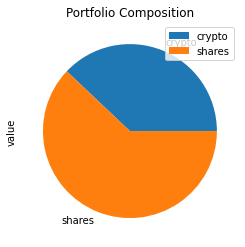

In [94]:
# Plot savings pie chart
df_savings.plot.pie(y="value", title="Portfolio Composition")

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if emergency_fund < total_savings:
        print("congratulating for having enough money in your fund!")
if emergency_fund > total_savings:
        print("congratulating for having the same amount of savings as emergency fund money and achieving your goal!")
if emergency_fund == total_savings:
        print(f"you have {emergency_fund - total_savings} to achieve your finanacial goal!")

congratulating for having enough money in your fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [96]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [98]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [100]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [101]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [102]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997704,0.994171,0.994006,0.991644,1.008881,1.002805,0.993493,1.000001,1.008543,1.004041,...,1.004375,1.008831,0.997176,1.005483,0.994418,0.996844,1.002676,1.004888,1.002766,1.000570
2,1.003067,0.985566,0.985253,0.991522,1.005827,1.002751,0.985951,0.996470,0.995303,1.002886,...,1.000185,1.001271,0.987087,1.006463,0.996521,0.995912,1.002542,1.008062,1.009093,0.997922
3,1.002848,0.985973,0.986586,0.998901,1.007294,1.002332,0.982730,1.000633,1.003059,1.006808,...,0.996409,1.002077,0.979977,1.013674,0.989382,0.988884,0.995668,1.013663,1.014283,0.992066
4,1.001903,0.990547,0.987303,0.994243,1.005389,1.013018,0.982762,1.002265,0.997112,1.008128,...,0.993332,1.003773,0.981067,1.016521,0.994393,0.990965,0.986893,1.013803,1.016310,0.993157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.086724,8.125056,17.714330,4.232618,9.803680,3.746739,7.475552,8.913709,5.949682,3.149551,...,5.755912,5.506914,3.205078,6.094579,6.093154,5.853075,3.808488,8.629072,4.509340,13.330066
7557,6.081537,8.106294,17.605174,4.213809,9.785782,3.763896,7.510218,8.910927,5.967158,3.156187,...,5.709918,5.516498,3.218027,6.074766,6.089109,5.892598,3.787593,8.647956,4.481850,13.384220
7558,6.066394,8.113680,17.474473,4.243473,9.791970,3.762232,7.525973,8.863881,5.933282,3.162283,...,5.671526,5.554367,3.235936,6.022503,6.060739,5.930062,3.788069,8.532826,4.476073,13.425622
7559,6.078960,8.089031,17.462820,4.237046,9.875004,3.771279,7.506954,8.842084,5.978032,3.153914,...,5.692758,5.555706,3.238335,6.043370,6.045742,5.858497,3.770629,8.568833,4.483081,13.553685


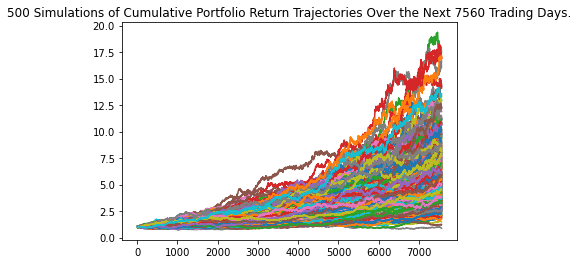

In [103]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

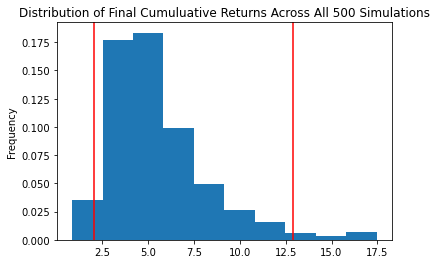

In [104]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [105]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.554480
std               2.727962
min               0.878280
25%               3.727119
50%               4.904198
75%               6.638708
max              17.449523
95% CI Lower      2.091598
95% CI Upper     12.926089
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [106]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41831.97 and $258521.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [107]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62747.95 and $387782.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [111]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [112]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000860,1.001778,0.997717,1.004040,1.005292,0.999992,1.000895,0.995524,0.990436,1.008155,...,0.996586,0.995909,1.004365,0.993833,1.004564,0.999535,0.995049,0.997834,0.995505,1.003046
2,0.997822,0.996382,1.001137,1.007402,1.009051,1.003334,0.998111,0.993204,0.987080,1.012259,...,1.006240,0.999973,1.008156,0.990932,1.008226,0.994884,1.002556,0.991859,0.998474,0.999011
3,1.003406,0.992156,0.998129,1.002864,1.003203,1.003172,0.999382,0.992368,0.994435,1.013647,...,1.000193,1.001843,1.004933,0.976233,1.010449,0.994647,0.998143,0.984694,0.995615,0.994197
4,1.001068,0.991737,0.995797,1.001408,1.001664,1.006015,0.996776,0.984929,0.990768,1.022070,...,0.999179,0.999578,1.000956,0.969026,1.019482,0.997186,1.000329,0.985806,1.001006,0.993713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.847279,1.360056,2.180026,1.061021,1.339345,1.397889,1.426896,1.296840,0.989587,1.241148,...,1.457511,1.117040,1.804648,1.314021,1.399172,1.215962,1.147497,1.426314,1.083004,1.378337
1257,1.857464,1.353306,2.178623,1.059501,1.331567,1.414471,1.432619,1.300096,0.993183,1.237058,...,1.463369,1.111937,1.813171,1.325699,1.404858,1.218894,1.143216,1.431869,1.080395,1.382340
1258,1.856284,1.349482,2.172015,1.055584,1.323738,1.426429,1.439701,1.299074,0.986379,1.223748,...,1.471926,1.112694,1.801471,1.326286,1.396733,1.223193,1.145444,1.441143,1.072198,1.392575
1259,1.850257,1.336479,2.185253,1.060299,1.317749,1.428588,1.428773,1.302697,0.982628,1.223824,...,1.469809,1.106880,1.802364,1.316920,1.398704,1.220982,1.150855,1.427551,1.067487,1.400767


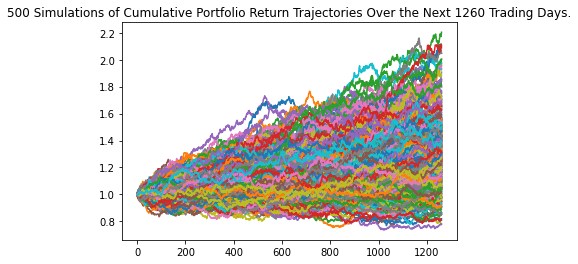

In [114]:
# Plot simulation outcomes
line_plot_5 = MC_even_dist_5.plot_simulation()

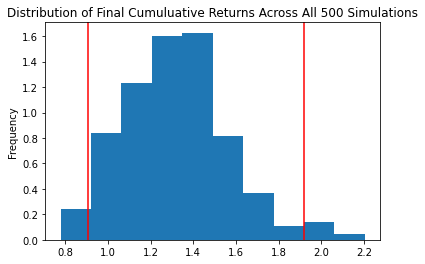

In [115]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_even_dist_5.plot_distribution()

In [116]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_even_dist_5.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.320086
std               0.242965
min               0.777680
25%               1.147350
50%               1.308207
75%               1.464366
max               2.203771
95% CI Lower      0.907515
95% CI Upper      1.916414
Name: 1260, dtype: float64


In [122]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(tbl_5[8]*initial_investment,2)
ci_upper_5 = round(tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54450.93 and $114984.82


### Ten Years Retirement Option

In [123]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [121]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993849,1.004771,1.007230,0.998938,1.006886,1.003162,0.991502,1.004199,1.004696,0.996261,...,0.996618,0.996546,1.004161,1.000037,1.001902,1.004391,0.992783,0.997769,0.998658,0.995957
2,0.993685,1.000548,1.013536,1.006534,1.011049,1.001850,0.994534,1.005405,1.001928,0.995514,...,1.006425,0.997012,1.006411,0.999569,0.995976,1.008002,0.988381,0.999271,1.001974,0.988713
3,0.997847,1.002750,1.016224,1.006971,1.018697,1.012572,1.003063,1.000030,1.004559,0.997670,...,1.004513,0.995063,1.003197,1.010127,0.995289,1.008600,0.979819,1.003081,1.010742,0.987866
4,0.999050,1.000893,1.007089,1.017874,1.012532,1.013761,1.004793,0.996564,1.006528,0.996305,...,1.006283,0.993108,1.002614,1.007049,0.992161,1.010440,0.987415,1.008385,1.013687,0.982860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.167480,1.642174,2.329246,1.932007,1.839228,1.387720,1.321966,1.513494,2.037802,1.502861,...,1.656132,1.776435,2.124601,1.602343,1.090872,1.170629,1.217734,2.095321,2.361749,2.168772
2517,1.173561,1.646445,2.314267,1.924767,1.842724,1.385916,1.313845,1.505814,2.034037,1.506180,...,1.667852,1.770288,2.133901,1.612979,1.105657,1.180645,1.209656,2.098638,2.354972,2.168223
2518,1.163020,1.648808,2.311871,1.937727,1.843995,1.396838,1.324026,1.515944,2.026955,1.507251,...,1.663767,1.782256,2.158475,1.592929,1.112817,1.178582,1.222697,2.103540,2.331398,2.165368
2519,1.168235,1.646101,2.301448,1.939219,1.839001,1.392573,1.326100,1.516521,2.025375,1.507224,...,1.669735,1.781151,2.176555,1.585243,1.119826,1.184769,1.218662,2.086111,2.317525,2.173124


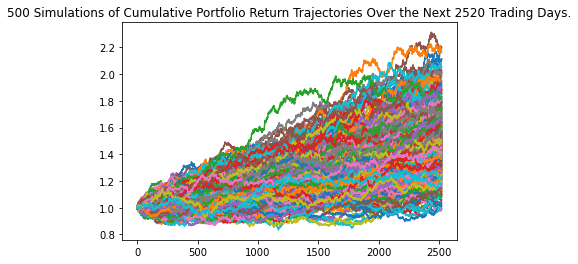

In [32]:
# Plot simulation outcomes
line_plot_10 = MC_even_dist_10.plot_simulation()

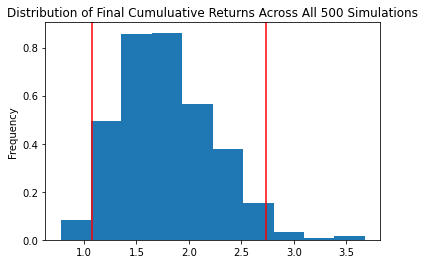

In [128]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_even_dist_10.plot_distribution()

In [125]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_even_dist_10.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [127]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(tbl_10[8]*initial_investment,2)
ci_upper_10 = round(tbl_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64701.06 and $164123.33
